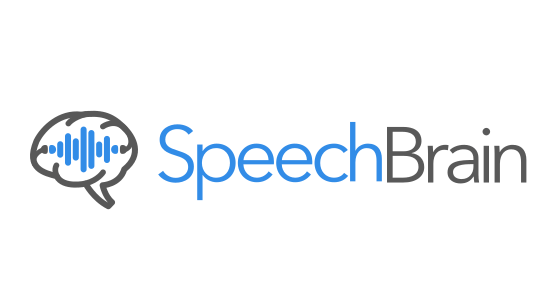

# **Introduction to SpeechBrain**

[SpeechBrain](https://speechbrain.github.io/) is an **open-source** **all-in-one** speech toolkit based on **PyTorch**. It is designed to make the development of Conversational AI easier.

## **Motivation**
- There are many technologies involved in modern conversational AI systems (e.g., speech processing, speech recognition, speech synthesis, language modeling, dialogue, etc).

- In the past, the dominant approach was to develop a **different toolkit for each different task**. Nevertheless, learning several toolkits is **time-demanding**, might require knowledge of **different programming languages**,  and forces you to familiarize yourself with  **different code styles and standards** (e.g., data readers).

- Nowadays, most of these tasks can be implemented with the same **deep learning**  technology.
We thus explicitly designed SpeechBrain to natively support **multiple tasks**. We think that this might make much easier the life of Conversational AI developers.

- SpeechBrain is built on top of [PyTorch](https://pytorch.org/). It extends PyTorch by implementing a bunch of functionalities specifically designed for Conversational AI. For instance, it implements popular models and it is released with tons of recipes for many different tasks and datasets. It also made pretrained models (coupled with easy-inference functions) available to the community through [huggingface](https://huggingface.co/speechbrain).

- Switching from one task to the other is relatively simple. Each task shares the same programming style, data specification standard (with CSV of JSON data manifests files), and hyperparameter specification approach (with hyperpyyaml). We also implemented our trainer (called the "brain" class) to make it easier to orchestrate the training loop and all its functionalities (such as recoverable checkpointing, resumable training, logging, etc).

- In the last lab, we have seen how easy it is to add a bug in your code. SpeechBrain minimizes possible issues by abstracting away some boilerplate code that might be bug-prone.





We called it SpeechBrain because we want a toolkit that, like our brain,

1. recognizes speech

2. understands its content

3. language

4. emotions

5. speakers

6. converses with humans.


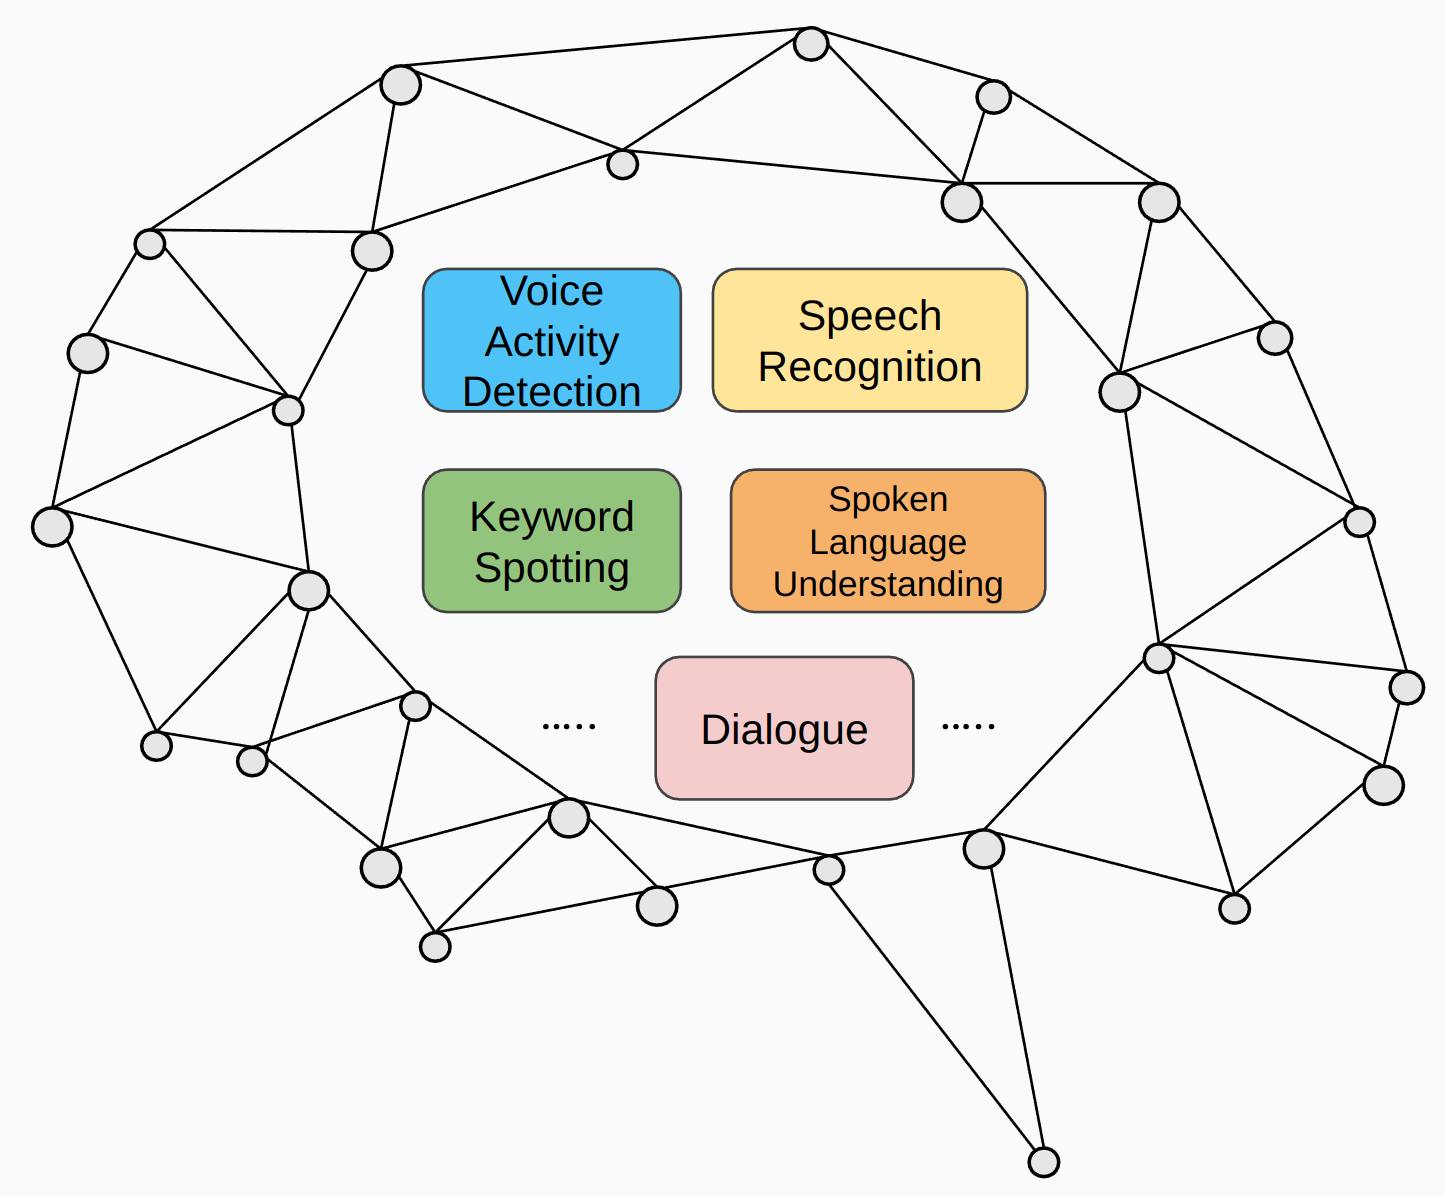

We did our best to design a toolkit that is:
*   *Easy to use*
*   *Easy to install*
*   *Easy to customize*
*  *Flexible*
* *Modular*
* *Well-documented*

Alternatives to SpeechBrain are:
- [ESPNET](https://github.com/espnet/espnet)
- [NeMO](https://github.com/NVIDIA/NeMo)
- [Kaldi](https://github.com/kaldi-asr/kaldi) (for speech recognition)
- [PyAnnote](https://pyannote.github.io/) (for speaker diarization)
- [Coqui-AI](https://github.com/coqui-ai/TTS) (for speech synthesis)

Students are welcome to take a look at these other toolkits as well.

## **Brief History**
The development of SpeechBrain started in February 2020 at Mila. The first version of SpeechBrain was publicly released in March 2021. Currently, SpeechBrain is one of the most used toolkits for speech processing (5.1k stars on gihub, 1000 forks, 116 contributors). The project is led by Mirco Ravanelli and Titouan Parcollet and involves a large international network of academic and industrial partners.

## **Resources**

*Website*: https://speechbrain.github.io/

*GitHub*: https://github.com/speechbrain/speechbrain

*HuggingFace*: https://huggingface.co/speechbrain

*Video Tutorials:* https://www.youtube.com/watch?v=TfgnmfxsPXY


SpeechBrain ia a major efforts that we are doing for the benefits of the commubity. If you appreciare our efforts, please star our project on GitHub to help us gaining visibility.


# **What can I do with SpeechBrain?**

Before diving into the software architecture of SpeechBrain, let's first see what we can do with it. SpeechBrain can already do a lot of cool things. You can use SpeechBrain for the following types of problems:

- **speech classification** (many-to-one, e.g. speaker-id)
- **speech regression** (speech-to-speech mapping, e.g., speech enhancement)
- **sequence-to-sequence** (speech-to-text mapping, e.g., speech recognition)
- **speech generation** (text to speech mapping, e.g., speech synthesis)

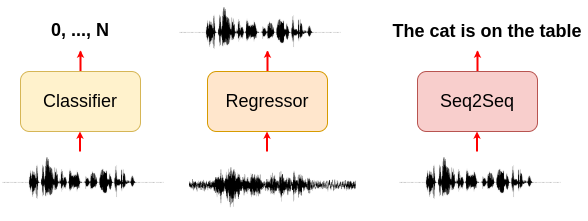

More precisely, SpeechBrain supports the following tasks:
- **Speech Recognition**: Speech-to-text ([see this tutorial](https://colab.research.google.com/drive/1aFgzrUv3udM_gNJNUoLaHIm78QHtxdIz?usp=sharing))
- **Speech Synthesis**: Text-to-speech ([see this tutorial](https://colab.research.google.com/drive/1aFgzrUv3udM_gNJNUoLaHIm78QHtxdIz?usp=sharing))
- **Speaker Recognition**: Speaker verification/ID ([see this tutorial](https://colab.research.google.com/drive/1UwisnAjr8nQF3UnrkIJ4abBMAWzVwBMh?usp=sharing)).
- **Speaker Diarization**: Detect who spoke when.
- **Speech Enhancement**: Noisy to clean speech ([see this tutorial](https://colab.research.google.com/drive/18RyiuKupAhwWX7fh3LCatwQGU5eIS3TR?usp=sharing)).
- **Speech Separation**: Separate overlapped speech ([see this tutorial](https://colab.research.google.com/drive/1YxsMW1KNqP1YihNUcfrjy0zUp7FhNNhN?usp=sharing)).
- **Spoken Language Understanding**: Speech to intent/slots.
- **Multi-microphone processing**: Combining input signals ([see this tutorial](https://colab.research.google.com/drive/1UVoYDUiIrwMpBTghQPbA6rC1mc9IBzi6?usp=sharing)).

Many other systems are yet to come. For all this tasks we provide recipes that allow users training a model from scratch. We made available all the pre-trained model and logs for all the experiments [here](https://drive.google.com/drive/folders/1ZVuROxR711Xib2MsJbcPla4PWqbK1Ddw?usp=sharing).

The standard way to train your model from scratch with SpeechBrain is the following:


```bash
cd recipe/dataset_name/task_name

python train.py train.yaml --data_folder=/path/of/your/data
```

Please, refer to the aforementioned tutorial for more information about training.



 In this brief tutorial, we just show how to use some of the pre-trained models made available on [HuggingFace](https://huggingface.co/speechbrain/). First of all, let's install SpeechBrain:

In [2]:
%%capture
!pip install speechbrain

We now download some speech signals:

In [3]:
%%capture
%cd /content
!wget -O example_mandarin.wav "https://www.dropbox.com/scl/fi/7jn7jg9ea2u6d9d70657z/example_mandarin.wav?rlkey=eh220qallihxp9yppm2kx7a2i&dl=1"
!wget -O example_rw.mp3 "https://www.dropbox.com/scl/fi/iplkymn8c8mbc6oclxem3/example_rw.mp3?rlkey=yhmqfsn8q43pmvd1uvjo3yl0s&dl=1"
!wget -O example_whamr.wav "https://www.dropbox.com/scl/fi/gxbtbf3c3hxr0y9dbf0nw/example_whamr.wav?rlkey=1wt5d49kjl36h0zypwrmsy8nz&dl=1"
!wget -O example-fr.wav "https://www.dropbox.com/scl/fi/vjn98vu8e3i2mvsw17msh/example-fr.wav?rlkey=vabmu4fgqp60oken8aosg75i0&dl=1"
!wget -O example-it.wav "https://www.dropbox.com/scl/fi/o3t7j53s7czaob8yq73rz/example-it.wav?rlkey=x9u6bkbcp6lh3602fb9uai5h3&dl=1"
!wget -O example.wav "https://www.dropbox.com/scl/fi/uws97livpeta7rowb7q7g/example.wav?rlkey=swppq2so15jibmpmihenrktbt&dl=1"
!wget -O example1.wav "https://www.dropbox.com/scl/fi/mu1tdejny4cbgxczwm944/example1.wav?rlkey=8pi7hjz15syvav80u1xzfbfhn&dl=1"
!wget -O example2.flac "https://www.dropbox.com/scl/fi/k9ouk6ec1q1fkevamodrn/example2.flac?rlkey=vtbyc6bzp9hknzvn9rb63z3yf&dl=1"
!wget -O test_mixture.wav "https://www.dropbox.com/scl/fi/4327g66ajs8aq3dck0fzn/test_mixture.wav?rlkey=bjdcw3msxw3armpelxuayug5i&dl=1"

Once installed, you should be able to import the speechbrain project with python:

In [4]:
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

### **Speech Recognition on Different Languages**

### *English*

In [5]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-conformersmall-transformerlm-librispeech", savedir="pretrained_models/asr-conformersmall-transformerlm-librispeech")
asr_model.transcribe_file("speechbrain/asr-conformersmall-transformerlm-librispeech/example.wav")

hyperparams.yaml:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


normalizer.ckpt:   0%|          | 0.00/1.70k [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

lm.ckpt:   0%|          | 0.00/381M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/324k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/speechbrain/processing/features.py:1311: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stats = torch.load(path, map_location=device)


example.wav:   0%|          | 0.00/104k [00:00<?, ?B/s]

'THE BIRCH CANOE SLID ON THE SMOOTH PLANKS'

In [6]:
signal = read_audio("example.wav").squeeze()
Audio(signal, rate=16000)

## *French*

In [7]:
from speechbrain.inference.ASR import EncoderASR

asr_model = EncoderASR.from_hparams(source="speechbrain/asr-wav2vec2-commonvoice-fr", savedir="pretrained_models/asr-wav2vec2-commonvoice-fr")
asr_model.transcribe_file('speechbrain/asr-wav2vec2-commonvoice-fr/example-fr.wav')

hyperparams.yaml:   0%|          | 0.00/2.66k [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

wav2vec2.ckpt:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/13.0M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/238k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

example-fr.wav:   0%|          | 0.00/227k [00:00<?, ?B/s]

'MON CHIEN EST LE PLUS BEAU'

In [ ]:
signal = read_audio("example-fr.wav").squeeze()
Audio(signal, rate=44100)

## *Italian*

In [8]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-wav2vec2-commonvoice-it", savedir="pretrained_models/asr-wav2vec2-commonvoice-it")
asr_model.transcribe_file("speechbrain/asr-wav2vec2-commonvoice-it/example-it.wav")

hyperparams.yaml:   0%|          | 0.00/3.13k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

wav2vec2.ckpt:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/60.6M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/245k [00:00<?, ?B/s]

example-it.wav:   0%|          | 0.00/136k [00:00<?, ?B/s]

'BUONGIORNO A TUTTI E BENVENUTI A BORDO'

In [ ]:
signal = read_audio("example-it.wav").squeeze()
Audio(signal, rate=16000)

## *Mandarin*

In [9]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-transformer-aishell", savedir="pretrained_models/asr-transformer-aishell_model")
asr_model.transcribe_file("speechbrain/asr-transformer-aishell/example_mandarin.wav")

<ipython-input-9-24fc93b58109>:1: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderDecoderASR


hyperparams.yaml:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

normalizer.ckpt:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/127M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/300k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/speechbrain/processing/features.py:1311: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stats = torch.load(path, map_location=device)


example_mandarin.wav:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

'他 应该 也是 喜欢'

In [ ]:
signal = read_audio("example_mandarin.wav").squeeze()
Audio(signal, rate=16000)

### **Speech Separation**

We here show a mixture with 2 speakers, but we have a state-of-the-art system for separating mixture with 3 speakers as well. We also have models that deals witj noise and reverberation. [See your HuggingFace repository](https://huggingface.co/speechbrain/)

In [10]:
from speechbrain.pretrained import SepformerSeparation as separator

model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
est_sources = model.separate_file(path='speechbrain/sepformer-wsj02mix/test_mixture.wav')

hyperparams.yaml:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

test_mixture.wav:   0%|          | 0.00/66.2k [00:00<?, ?B/s]

In [11]:
signal = read_audio("test_mixture.wav").squeeze()
Audio(signal, rate=8000)

In [12]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [13]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

### **Speech Enhancement**
The goal of speech enhancement is to remove the noise that affects a recording.
Speechbrain has several systems for speech enhancement. In the following, you can find an example processed by the SepFormer (the version trained to perform enhancement):

In [14]:
from speechbrain.pretrained import SepformerSeparation as separator
import torchaudio

model = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement')
enhanced_speech = model.separate_file(path='speechbrain/sepformer-whamr-enhancement/example_whamr.wav')


hyperparams.yaml:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

example_whamr.wav:   0%|          | 0.00/164k [00:00<?, ?B/s]

In [15]:
signal = read_audio("example_whamr.wav").squeeze()
Audio(signal, rate=8000)

In [16]:
Audio(enhanced_speech[:, :].detach().cpu().squeeze(), rate=8000)

### **Speaker Verification**
The task here is to determine whether two sentences belong to the same speaker or not.

In [17]:
from speechbrain.pretrained import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("speechbrain/spkrec-ecapa-voxceleb/example1.wav", "speechbrain/spkrec-ecapa-voxceleb/example2.flac")

print(prediction, score)

hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

example1.wav:   0%|          | 0.00/104k [00:00<?, ?B/s]

example2.flac:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

tensor([False]) tensor([0.1799])


In [18]:
signal = read_audio("example1.wav").squeeze()
Audio(signal, rate=16000)

In [19]:
signal = read_audio("example2.flac").squeeze()
Audio(signal, rate=16000)

### **Speech Synthesys (Text-to-Speech)**
The goal of speech synthesys is to create a speech signal from the input text.
If the following you can find an example with the popular [Tacotron2](https://arxiv.org/abs/1712.05884) model coupled with [HiFiGAN](https://arxiv.org/abs/2010.05646) as a vocoder:

In [20]:
import torchaudio
from speechbrain.pretrained import Tacotron2
from speechbrain.pretrained import HIFIGAN

# Intialize TTS (tacotron2) and Vocoder (HiFIGAN)
tacotron2 = Tacotron2.from_hparams(source="speechbrain/tts-tacotron2-ljspeech", savedir="tmpdir_tts")
hifi_gan = HIFIGAN.from_hparams(source="speechbrain/tts-hifigan-ljspeech", savedir="tmpdir_vocoder")

# Running the TTS
mel_output, mel_length, alignment = tacotron2.encode_text("This is an open-source toolkit for the development of speech technologies.")

# Running Vocoder (spectrogram-to-waveform)
waveforms = hifi_gan.decode_batch(mel_output)

hyperparams.yaml:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

hyperparams.yaml:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


generator.ckpt:   0%|          | 0.00/55.8M [00:00<?, ?B/s]

In [21]:
Audio(waveforms.detach().cpu().squeeze(), rate=22050)

### **Other Tasks**
We support several other tasks. Click at the link below to see the pretrained model and the easy-inference function:

- [Speech Enhancement](https://huggingface.co/speechbrain/metricgan-plus-voicebank)
- [Command Recognition](https://huggingface.co/speechbrain/google_speech_command_xvector)
- [Spoken Language Understanding](https://huggingface.co/speechbrain/slu-timers-and-such-direct-librispeech-asr)
- [Urban Sound Classification](https://huggingface.co/speechbrain/urbansound8k_ecapa)
- [Grapheme-to-Phoneme](https://huggingface.co/speechbrain/soundchoice-g2p).

# **Basic Software Architecture**
Let's now dive a bit into the SpeechBrain Architecture.


## **Library or framework?**

A library offers building blocks that you put together to form a program. Numpy is a library.
```python
import numpy as np
noise_signal = np.random.normal(0,1,100)
noise_spectrum = np.fft.rfft(noise_signal)
```

A framework has a prepared structure of how a program runs, and you provide the key building blocks, which determine what the program does. Flask is a framework.
```python
from flask import Flask
app = Flask(__name__)

@app.route("/isthisodd/<int:number>", )
def isodd(number):
    return number % 2
```
```
> export FLASK_APP=odd.py
> flask run
 * Running on http://127.0.0.1:5000/
```

SpeechBrain is a bit of both:


*   Mostly provides modular neural speech processing building blocks
*   `Brain` class has a pre-defined training loop, you provide `.compute_forward()` and `.compute_objectives()`

So we're calling it a _toolkit_.




## **Installation**

There are essentially two ways to install SpeechBrain:
*  **Local installation**: it is suggested if you want to modify the toolkit or train a full speech processing system from scratch.

*  **Install via PyPI**: it is suggested when you wanna just use some core functionality of SpeechBrain in your project.



### Local Installation (Git clone)

In [1]:
%%capture
# Local installation
!git clone https://github.com/speechbrain/speechbrain/
%cd /content/speechbrain/
!pip install -r requirements.txt
!pip install -e .

In [ ]:
import speechbrain as sb

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


### PyPI Installation


In [ ]:
%%capture
!pip install speechbrain

Once installed, you should be able to import the speechbrain project with python:

## **Train a Model**


To run an experiment with SpeechBrain, the typical syntax is:

```
python train.py hparams.yaml
```

All the hyperparameters are summarized in a yaml file, while the main script for training is `train.py`.

For instance, let's run one of the minimal examples made available with SpeechBrain:

In [ ]:
%cd /content/speechbrain/tests/integration/ASR_CTC/
!python example_asr_ctc_experiment.py hyperparams.yaml

/content/speechbrain/tests/integration/ASR_CTC
/content/speechbrain/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
/content/speechbrain/speechbrain/core.py:798: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=gradscaler_enabled)
100% 8/8 [00:04<00:00,  2.00it/s, train_loss=12.2]
100% 2/2 [00:00<00:00,  6.51it/s]
Epoch 0 complete
Train loss: 12.20
Stage.VALID loss: 4.76
Stage.VALID PER: 90.91
100% 8/8 [00:04<00:00,  1.83it/s, train_loss=7.1]
100% 2/2 [00:00<00:00,  4.45it/s]
Epoch 1 complete
Train loss: 7.10
Stage.VALID loss: 4.36
Stage.VALID PER: 96.36
100% 8/8 [00:04<00:00,  1.87it/s, train_loss=4.72]
100% 2/2 [00:00<00:00,  6.73it/s]
Epoch 2 complete
Train loss: 

In this case,  we trained a CTC-based **speech recognizer** with a tiny dataset stored in the folder `samples`. As you can see, the training loss is very small, which indicates that the model is implemented correctly.
The validation loss, instead, is high. This happens because, as expected, the dataset is too small to allow the network to generalize.

All the results of the experiments are stored in the `output_folder` defined in the yaml file. Here, you can find, the checkpoints, the trained models, a file summarizing the performance, and a logger. For all the recipe currently
 supported, you can find our results here:

https://drive.google.com/drive/folders/1ZVuROxR711Xib2MsJbcPla4PWqbK1Ddw?usp=sharing

This way, you can compare your performance with the one achieved by us and you can have access to all the pre-trained models.

The following picture gives a high-level overview on what is going on within the training script:

# 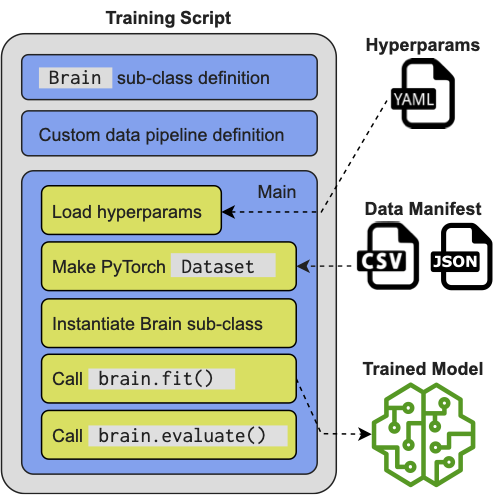

In the remaining part of this tutorial, we will describe the main components:

- Hyperrparameter Specification
- Data loading
- Training Script

## **Hyperparameter specification with YAML**

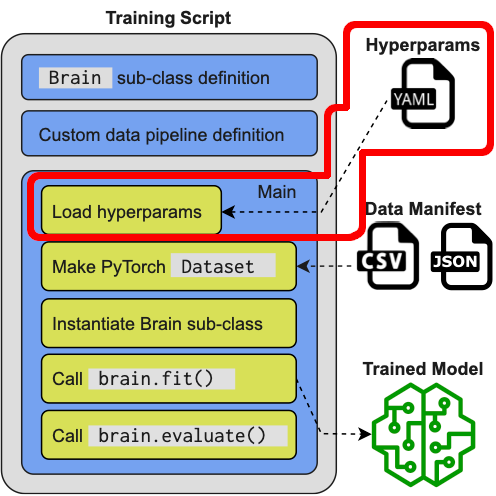

Machine learning systems often require the specification of several hyperparameters. In SpeechBrain, we do it with HypepyYAML (a variation of the standard YAML language). It allows us to specify the hyperparameters in an elegant,  flexible,  and transparent way.

Let's see for instance this yaml snippet:


```yaml
dropout: 0.8
compute_features: !new:speechbrain.lobes.features.MFCC
    n_mels: 40
    left_frames: 5
    right_frames: 5

model: !new:speechbrain.lobes.models.CRDNN.CRDNN
   input_shape: [null, null, 440]
   activation: !name:torch.nn.LeakyReLU []
   dropout:  !ref <dropout>
   cnn_blocks: 2
   cnn_channels: (32, 16)
   cnn_kernelsize: (3, 3)
   time_pooling: True
   rnn_layers: 2
   rnn_neurons: 512
   rnn_bidirectional: True
   dnn_blocks: 2
   dnn_neurons: 1024
```

As you can see, this is not just a plain list of hyperparameters. For each parameter, we specify the class (or function) that is going to use it. This makes the code **more transparent** and **easier to debug**.

The YAML file contains all the information to initialize the classes when loading them. In SpeechBrain we load it with a special function called `load_hyperpyyaml`, which initializes for us all the declared classes. This makes the code extremely **readable** and **compact**.

Here is an example:



In [ ]:
from hyperpyyaml import load_hyperpyyaml
import torch

example_hyperparams = """
base_channels: 32
kernel_size: 11
padding: !ref <kernel_size> // 2

layer1: !new:torch.nn.Conv1d
  in_channels: 1
  out_channels: !ref <base_channels>
  kernel_size: !ref <kernel_size>
  padding: !ref <padding>

layer2: !new:torch.nn.Conv1d
  in_channels: !ref <base_channels>
  out_channels: !ref <base_channels> * 2
  kernel_size: !ref <kernel_size>
  padding: !ref <padding>

model: !new:torch.nn.Sequential
    - !ref <layer1>
    - !new:torch.nn.LeakyReLU
    - !ref <layer2>
    - !new:torch.nn.LeakyReLU
"""

# Create model directly by loading the YAML
hparams = load_hyperpyyaml(example_hyperparams)

# Transform a 2-second audio clip
input_audio = torch.rand(1, 1, 32000)
transformed_audio = hparams["model"](input_audio)
print(transformed_audio.shape)


torch.Size([1, 64, 32000])


Our hyperpyyaml is an extension of the standard YAML. For an overview of all the supported functionalities, please take a look at the [YAML tutorial](https://colab.research.google.com/drive/1Pg9by4b6-8QD2iC0U7Ic3Vxq4GEwEdDz?usp=sharing).

Here you can see a compasison:


*Normal YAML*:
```yaml
base_channels: 32
kernel_size: &KS 11

layer1: !!python/object/new:torch.nn.Conv1d
  in_channels: 1
  out_channels: 32
  kernel_size: *KS
  padding: 5
```

*HyperPyYAML*:
```yaml
base_channels: 32
kernel_size: 11

layer1: !new:torch.nn.Conv1d
  in_channels: 1
  out_channels: !ref <base_channels>
  kernel_size: !ref <kernel_size>
  padding: !ref <kernel_size> // 2

datadir: /scratch/data/
train_datadir: !ref <datadir>/train

```

[HyperpyYAML](https://github.com/speechbrain/HyperPyYAML) makes several extensions to yaml including easier object creation, nicer aliases, and tuples. This makes it more suitable for an elegant hyperam specification of complex machine learning models.

### Hyperparameter overrding
Note that all the hyperparameters can be overridden from the command line. For instance, to change the dropout factor:

`python experiment.py params.yaml --dropout=0.5 `

## **Data loading**

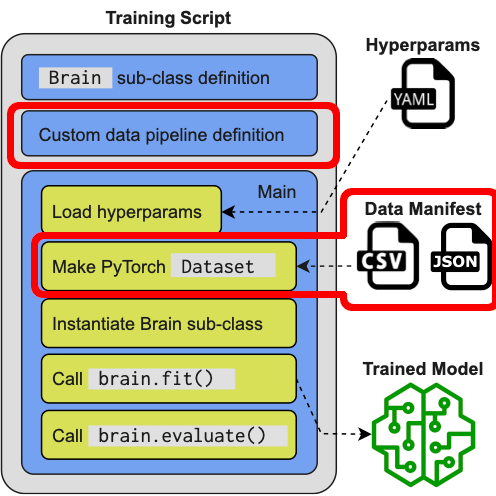


### **PyTorch Data loading (map-style)**
PyTorch data loading can run in many configurations,
but a typical approach has these basic elements:
- a [Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), which loads data points one-at-a-time.
- a [collation function](https://pytorch.org/docs/stable/data.html#dataloader-collate-fn), or ``collate_fn`` for short, which takes a list of data points and forms a batch.
- a [Sampler](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler), which determines the order in which the Dataset is iterated.
- a [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), which combines the elements above (and has defaults for ``collate_fn`` and Sampler), and orchestrates the whole pipeline.



### **Data manifest: A listing of the data**

These contain the _static items_ of the data.

```json
{
    "3000-15664-0023": {
        "file_path": "{dataroot}/dev-clean-2/3000/15664/3000-15664-0023.flac",
        "words": "MOUNT BREMER IS THE MOST NOTED STRONGHOLD OF THE SHEEP IN THE WHOLE SHASTA REGION",
        "spkID": "speaker_3000",
        "length": 82481
    },
    "3000-15664-0003": {
        "file_path": "{dataroot}/dev-clean-2/3000/15664/3000-15664-0003.flac",
        "words": "GO QUIETLY ALONE NO HARM WILL BEFALL YOU",
        "spkID": "speaker_3000",
        "length": 74720
    },
...
```

```csv
id,file_path,words,spkID,duration
3000-15664-0023,{dataroot}/dev-clean-2/3000/15664/3000-15664-0023.flac,MOUNT BREMER IS THE MOST NOTED STRONGHOLD OF THE SHEEP IN THE WHOLE SHASTA REGION,speaker_3000,82481
3000-15664-0003,{dataroot}/dev-clean-2/3000/15664/3000-15664-0003.flac,GO QUIETLY ALONE NO HARM WILL BEFALL YOU,speaker_3000,74720
3000-15664-0028,{dataroot}/dev-clean-2/3000/15664/3000-15664-0028.flac,BUT NEITHER THE GLORIFIED WOODS ON THE ONE HAND NOR THE LAKE ON THE OTHER COULD AT FIRST HOLD THE EYE,speaker_3000,103680
3000-15664-0008,{dataroot}/dev-clean-2/3000/15664/3000-15664-0008.flac,YET STRANGE TO SAY THERE ARE DAYS EVEN HERE SOMEWHAT DULL LOOKING WHEN THE MOUNTAIN SEEMS UNCOMMUNICATIVE SENDING OUT NO APPRECIABLE INVITATION AS IF NOT AT HOME,speaker_3000,207760
3000-15664-0017,{dataroot}/dev-clean-2/3000/15664/3000-15664-0017.flac,IT IS THREE OR FOUR MILES LONG AND TERMINATES AT AN ELEVATION OF ABOUT NINE THOUSAND FIVE HUNDRED FEET ABOVE SEA LEVEL IN MORAINE SPRINKLED ICE CLIFFS SIXTY FEET HIGH,speaker_3000,225360
3000-15664-0036,{dataroot}/dev-clean-2/3000/15664/3000-15664-0036.flac,UNDER CERTAIN CONDITIONS YOU MAY HEAR THE ROAR OF THE WATER RUSHING FROM THE ROCK AT A DISTANCE OF HALF A MILE OR EVEN MORE OR YOU MAY NOT HEAR IT UNTIL WITHIN A FEW RODS,speaker_3000,195600
3000-15664-0015,{dataroot}/dev-clean-2/3000/15664/3000-15664-0015.flac,IN APPROACHING IT ITS SUSPICIOUS LOOKING YELLOW SPOTTED HOOD AND WATCHFUL ATTITUDE WILL BE LIKELY TO MAKE YOU GO CAUTIOUSLY THROUGH THE BOG WHERE IT STANDS AS IF YOU WERE APPROACHING A DANGEROUS SNAKE,speaker_3000,212160
3000-15664-0006,{dataroot}/dev-clean-2/3000/15664/3000-15664-0006.flac,ONLY A LITTLE FOOD WILL BE REQUIRED,speaker_3000,40800
```

In [ ]:
import json
data_manifest = {
    "3000-15664-0023": {
        "file_path": "{dataroot}/dev-clean-2/3000/15664/3000-15664-0023.flac",
        "words": "MOUNT BREMER IS THE MOST NOTED STRONGHOLD OF THE SHEEP IN THE WHOLE SHASTA REGION",
        "spkID": "speaker_3000",
        "length": 82481
    },
    "3000-15664-0003": {
        "file_path": "{dataroot}/dev-clean-2/3000/15664/3000-15664-0003.flac",
        "words": "GO QUIETLY ALONE NO HARM WILL BEFALL YOU",
        "spkID": "speaker_3000",
        "length": 74720
    },
}
with open("train.json", "w") as fo:
    json.dump(data_manifest, fo)

In [ ]:
sb.dataio.dataio.load_data_json("train.json", replacements={"dataroot": "/scratch/work/data/"})

{'3000-15664-0023': {'file_path': '/scratch/work/data//dev-clean-2/3000/15664/3000-15664-0023.flac',
  'words': 'MOUNT BREMER IS THE MOST NOTED STRONGHOLD OF THE SHEEP IN THE WHOLE SHASTA REGION',
  'spkID': 'speaker_3000',
  'length': 82481},
 '3000-15664-0003': {'file_path': '/scratch/work/data//dev-clean-2/3000/15664/3000-15664-0003.flac',
  'words': 'GO QUIETLY ALONE NO HARM WILL BEFALL YOU',
  'spkID': 'speaker_3000',
  'length': 74720}}

### **DynamicItemDataset**

In [ ]:
dataset = sb.dataio.dataset.DynamicItemDataset.from_json("train.json", replacements={"dataroot": "/scratch/work/data/"})
dataset.set_output_keys(["id", "words"])
dataset[0]

{'id': '3000-15664-0023',
 'words': 'MOUNT BREMER IS THE MOST NOTED STRONGHOLD OF THE SHEEP IN THE WHOLE SHASTA REGION'}

Some items are loaded dynamically, on-demand

In [ ]:
@sb.utils.data_pipeline.takes("file_path", "length")
@sb.utils.data_pipeline.provides("signal")
def load_audio(file_path, length):
    # Fake a signal for the presentation:
    torch.manual_seed(hash(file_path))
    return torch.rand((1,length)).squeeze(0)

In [ ]:
@sb.utils.data_pipeline.takes("words")
@sb.utils.data_pipeline.provides("chars")
def char_tokenize(words):
    return [char if char != " " else "<SPACE>" for char in words]

In [ ]:
idmap = {'3000-15664-0003':0, '3000-15664-0023':1}
@sb.utils.data_pipeline.takes("id")
@sb.utils.data_pipeline.provides("audio_id")
def id_to_tensor(identifier):
    return torch.LongTensor([idmap[identifier]])

In [ ]:
dataset.add_dynamic_item(char_tokenize)
dataset.add_dynamic_item(load_audio)
dataset.add_dynamic_item(id_to_tensor)

In [ ]:
dataset.set_output_keys(["audio_id","signal","chars"])
dataset[0]

{'audio_id': tensor([1]),
 'signal': tensor([0.5855, 0.9390, 0.3888,  ..., 0.6462, 0.1046, 0.1297]),
 'chars': ['M',
  'O',
  'U',
  'N',
  'T',
  '<SPACE>',
  'B',
  'R',
  'E',
  'M',
  'E',
  'R',
  '<SPACE>',
  'I',
  'S',
  '<SPACE>',
  'T',
  'H',
  'E',
  '<SPACE>',
  'M',
  'O',
  'S',
  'T',
  '<SPACE>',
  'N',
  'O',
  'T',
  'E',
  'D',
  '<SPACE>',
  'S',
  'T',
  'R',
  'O',
  'N',
  'G',
  'H',
  'O',
  'L',
  'D',
  '<SPACE>',
  'O',
  'F',
  '<SPACE>',
  'T',
  'H',
  'E',
  '<SPACE>',
  'S',
  'H',
  'E',
  'E',
  'P',
  '<SPACE>',
  'I',
  'N',
  '<SPACE>',
  'T',
  'H',
  'E',
  '<SPACE>',
  'W',
  'H',
  'O',
  'L',
  'E',
  '<SPACE>',
  'S',
  'H',
  'A',
  'S',
  'T',
  'A',
  '<SPACE>',
  'R',
  'E',
  'G',
  'I',
  'O',
  'N']}

### **Batching**

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=sb.dataio.batch.PaddedBatch)
batch = next(iter(dataloader))
batch.signal

PaddedData(data=tensor([[0.5855, 0.9390, 0.3888,  ..., 0.6462, 0.1046, 0.1297],
        [0.2853, 0.7811, 0.8210,  ..., 0.0000, 0.0000, 0.0000]]), lengths=tensor([1.0000, 0.9059]))

In [ ]:
batch.signal.data.shape

torch.Size([2, 82481])

In [ ]:
batch.signal.lengths

tensor([1.0000, 0.9059])

In [ ]:
batch.chars[1][0:10]

['G', 'O', '<SPACE>', 'Q', 'U', 'I', 'E', 'T', 'L', 'Y']

In [ ]:
batch.signal.data[1,80000:]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

## **Training Script**
The training script (e.g., `example_asr_ctc_experiment.py` in the example) trains a model by **combining** the functions or **classes declared in the yaml file**. This script defines and uses the data loading pipeline described above. Moreover, it orchestrates the training loop with a special class called the brain class.


### **Brain Class**
To make training easier, we implemented a simple trainer called **Brain class**. The Brain class defines a set of customizable routines that implement all the steps needed in standard **training and validation loops**.

The first step is to Subclassing Brain. The goal of this step is to allow users to define the computations needed for their models and task. For instance, you typically have to modify the `compute_forward` and `compute_objectives` functions and integrates your comoutations.

### Subclassing Brain
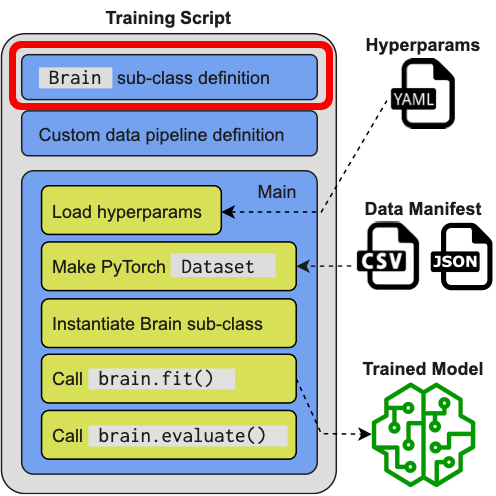

In [ ]:
class AudioIDBrain(sb.Brain):
    def compute_forward(self, batch, stage):
        pass
    def compute_objectives(self, predictions, batch, stage):
        pass

In [ ]:

new_hyperparams = """
ncoeff: 13
features: !new:speechbrain.lobes.features.MFCC
  left_frames: 3
  right_frames: 3
  deltas: False
  n_mfcc: !ref <ncoeff>

model: !new:torch.nn.Linear [!ref <ncoeff> * 7, 2]

modules:
  model: !ref <model>

softmax: !new:torch.nn.LogSoftmax
  dim: 1

loss: !new:torch.nn.NLLLoss

optimizer: !name:torch.optim.SGD
  lr: 0.5
"""

hparams = load_hyperpyyaml(new_hyperparams)


DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
/content/speechbrain/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


In [ ]:
brain = AudioIDBrain(modules=hparams["modules"], hparams=hparams)
brain.hparams.features(torch.randn((1,82314))).shape

INFO:speechbrain.core:Gradscaler enabled: False. Using precision: fp32.
/content/speechbrain/speechbrain/core.py:798: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=gradscaler_enabled)
INFO:speechbrain.core:AudioIDBrain Model Statistics:
* Total Number of Trainable Parameters: 184
* Total Number of Parameters: 184
* Trainable Parameters represent 100.0000% of the total size.


torch.Size([1, 515, 91])

In [ ]:
brain.modules.model

Linear(in_features=91, out_features=2, bias=True)

In [ ]:
class AudioIDBrain(sb.Brain):
    def compute_forward(self, batch, stage):
        x = self.hparams.features(batch.signal.data)
        x = self.modules.model(x[:,5,:])  # Pick fifth element in sequence.
        x = self.hparams.softmax(x)
        return x

   def compute_objectives(self, predictions, batch, stage):
        if stage == sb.Stage.TRAIN:
            return self.hparams.loss(predictions, batch.audio_id.data.squeeze(1))
        else:
            print("Predictions:", torch.argmax(predictions), "Answer:", batch.audio_id.data)
            return self.hparams.loss(predictions, batch.audio_id.data.squeeze(1))

In [ ]:
brain = AudioIDBrain(modules=hparams["modules"],
                     hparams=hparams,
                     opt_class=hparams["optimizer"])


INFO:speechbrain.core:Gradscaler enabled: False. Using precision: fp32.
INFO:speechbrain.core:AudioIDBrain Model Statistics:
* Total Number of Trainable Parameters: 184
* Total Number of Parameters: 184
* Trainable Parameters represent 100.0000% of the total size.


After instanciating the brain class, you can call the .fit method to start training:

In [ ]:
brain.fit(range(100), dataset, train_loader_kwargs={"batch_size":1})

100%|██████████| 2/2 [00:00<00:00, 78.08it/s, train_loss=1.19e-7]


Here is a simple graphic to show all the override-able calls within `fit()`. We'll go over these one-by-one through the rest of the tutorial.

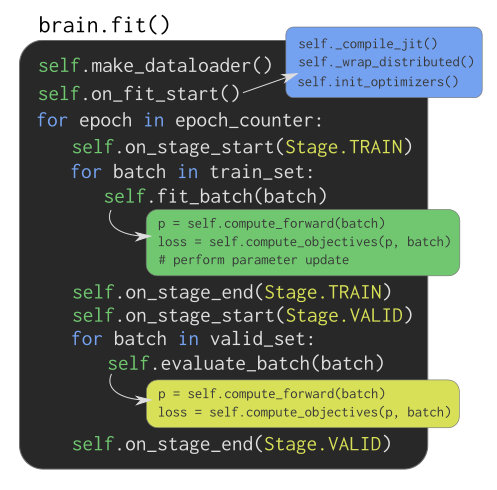

For a detail description of all the overradables method, please take a look at this [tutorial](https://colab.research.google.com/drive/1fdqTk4CTXNcrcSVFvaOKzRfLmj4fJfwa?usp=sharing).

Once the model is traned, we can evalaute the performance with the `.evaluate` method.

In [ ]:
brain.evaluate(dataset,progressbar=False)

Predictions: tensor(1) Answer: tensor([[1]])
Predictions: tensor(0) Answer: tensor([[0]])


1.1920927533992653e-07

# **Additional Resources**

In this tutorial, we gave a general overview of the components of speechbrain. To get a better idea about how to combine the components and create a real recipe, you can take a look at the code directly (for instance [see this simple recipe](https://github.com/speechbrain/speechbrain/tree/develop/templates/speaker_id)) or to [this simple tutorial](https://colab.research.google.com/drive/1UwisnAjr8nQF3UnrkIJ4abBMAWzVwBMh?usp=share_link).

We also encourage users to see the other [tutorials](https://speechbrain.github.io/index.html) to better understand the different functionalities implemented in speechbrain.

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={SpeechBrain: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS}
}
```

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```